# 이미지 파일 전처리

In [2]:
# 필요 라이브러리 import
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import splitfolders
from PIL import Image

In [3]:
# 데이터 경로 설정
train_data_path = os.path.join(os.getcwd(), 'jpg_data', 'train')
test_data_path = os.path.join(os.getcwd(), 'jpg_data', 'valid')

In [6]:
# Tomato Disease Labels
disease_labels = {'Bacterial_spot': 0,
                    'Early_blight': 1,
                    'Late_blight': 2,
                    'Leaf_Mold': 3,
                    'powdery_mildew' : 4,
                    'Septoria_leaf_spot': 5,
                    'Spider_mites Two-spotted_spider_mite': 6,
                    'Target_Spot': 7,
                    'Tomato_mosaic_virus': 8,
                    'Tomato_Yellow_Leaf_Curl_Virus': 9,
                    'healthy': 10}

### 전처리

In [12]:
def image_preprocessing(path):
    image_data = []
    image_label = []

    for label in os.listdir(path):
        folder_class = os.path.join(path, label)

        for file_name in os.listdir(folder_class):
            image = Image.open(folder_class+"/"+file_name)
            image = image.resize((224,224))     # 224x224로 이미지 크기 조정(ResNet50 input size)
            image = image.convert("RGB")
            image = np.array(image)
            image_data.append(image)
            image_label.append(disease_labels[label])

    return np.array(image_data), np.array(image_label)

# Train Data Preprocessing
train_image_data, train_image_label = image_preprocessing(train_data_path)
X_train, y_train = train_image_data, train_image_label

# Test Data Preprocessing
test_image_data, test_image_label = image_preprocessing(test_data_path)
X_test, y_test = test_image_data, test_image_label


In [27]:
print(f"{'Train Data Shape':18s}: {X_train.shape}")
print(f"{'Train Label Shape':18s}: {y_train.shape}")
print(f"{'Test Data Shape':18s}: {X_test.shape}")
print(f"{'Test Label Shape':18s}: {y_test.shape}")

Train Data Shape  : (25492, 224, 224, 3)
Train Label Shape : (25492,)
Test Data Shape   : (6530, 224, 224, 3)
Test Label Shape  : (6530,)


In [28]:
class_labels = ['Bacterial_spot','Early_blight','Late_blight','Leaf_Mold',
 'Septoria_leaf_spot','Spider_mites Two-spotted_spider_mite','Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus','Tomato_mosaic_virus','healthy','powdery_mildew']
len(class_labels)

11

# Train image data

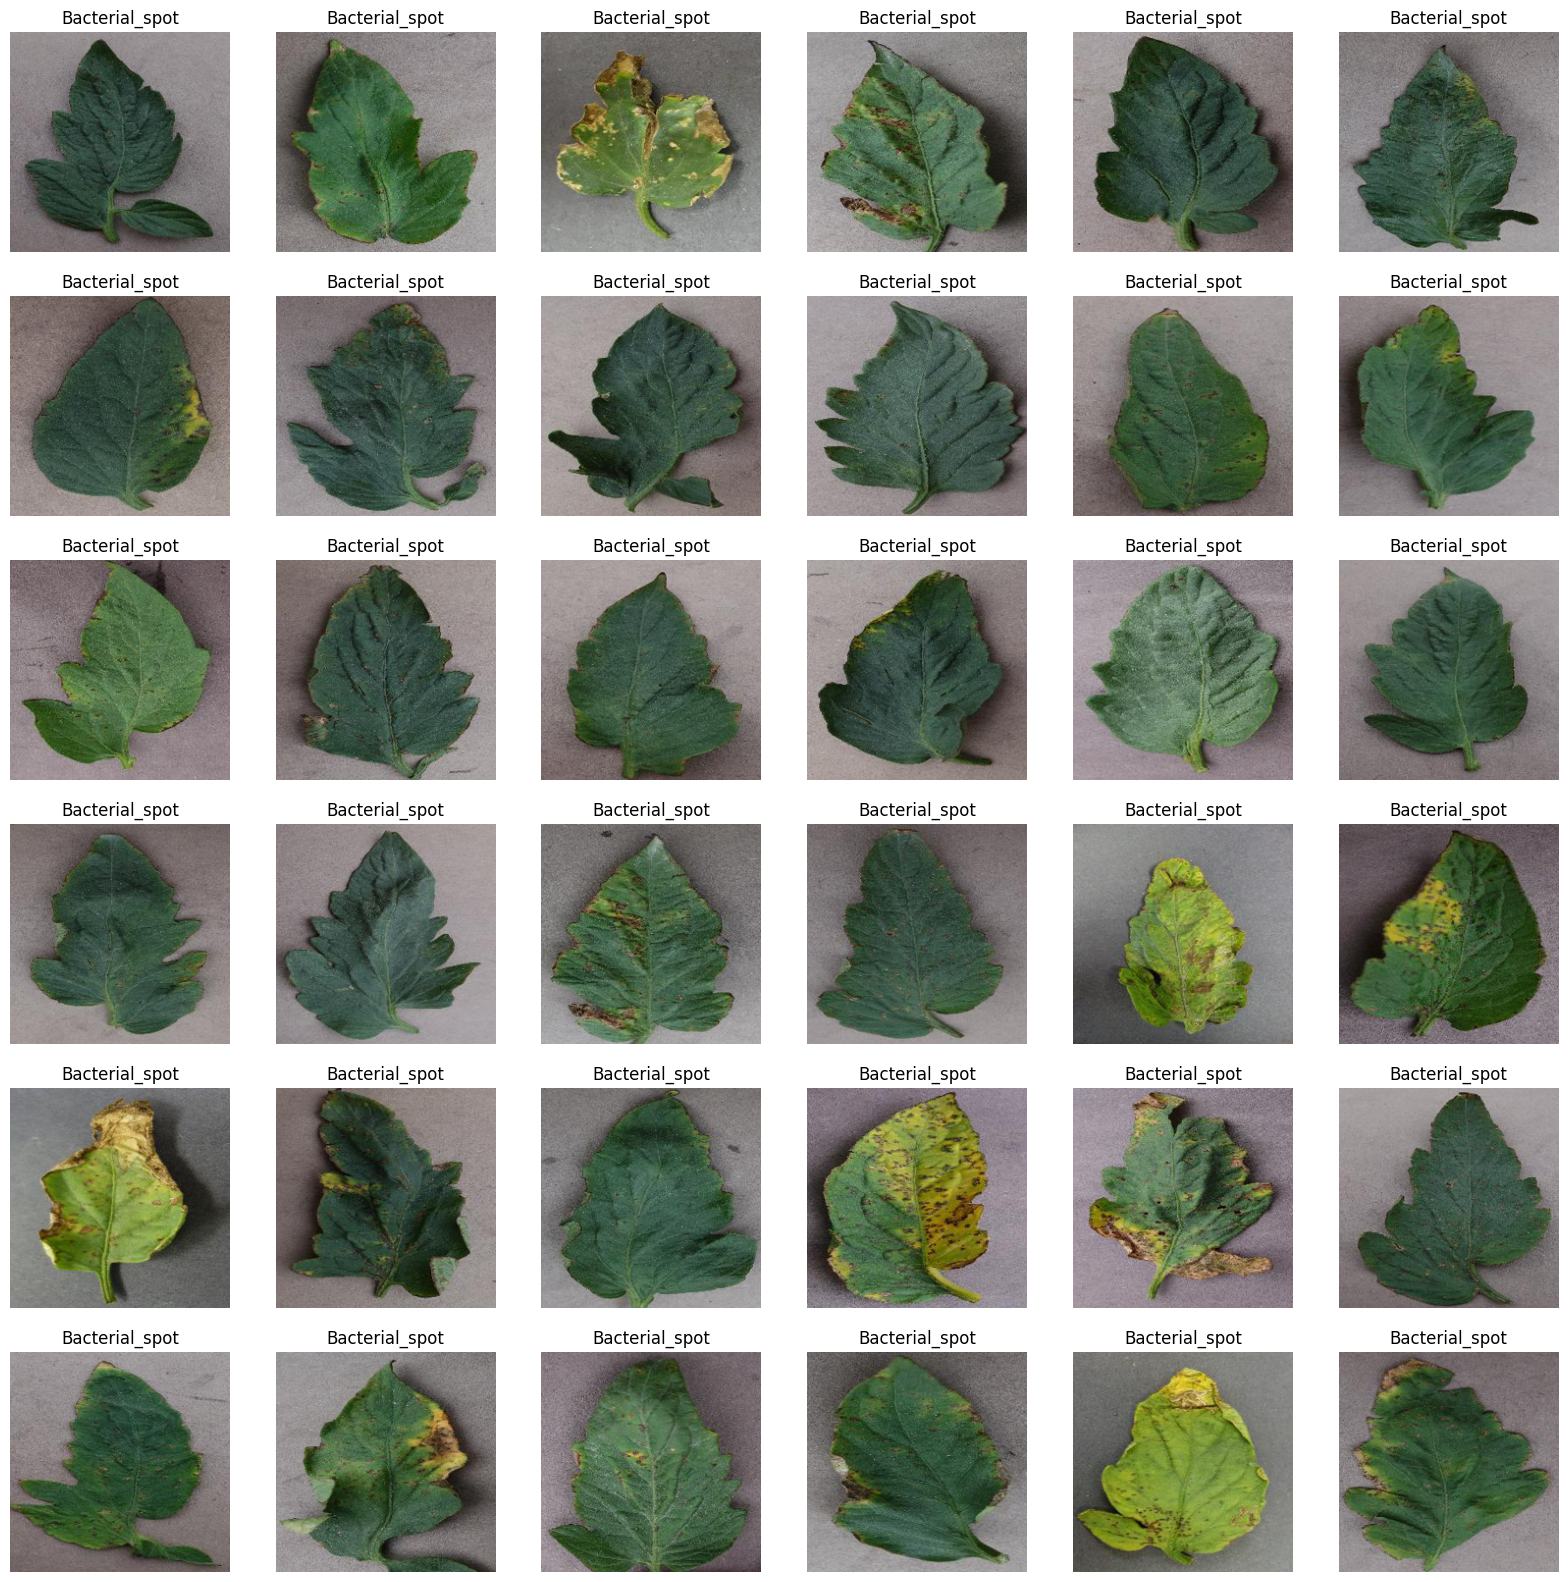

In [32]:
plt.figure(figsize=(20,20))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train[i]])
    plt.axis("off")